# TALLER K-MEANS

###Juan Soto - Andres Useche - Rafael Torregroza


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# K -MEANS DATASET: kmeans_dataset

In [2]:
df_kmeans = pd.read_csv("/content/kmeans_dataset.csv")
df_kmeans.head(20)

,Feature_1,Feature_2
0,0.943776,1.246380
1,0.921489,1.099754
2,0.930273,1.005432
3,0.935165,1.337223
4,0.906957,1.084256
5,1.019401,1.106939
6,0.940235,1.340489
7,0.889422,1.207855
8,1.178344,0.971668
9,0.917550,0.923629


In [3]:
df_kmeans.describe()

,Feature_1,Feature_2
count,3.400000e+03,3.400000e+03
mean,-5.851528e-16,4.179663e-16
std,1.000147e+00,1.000147e+00
min,-2.510792e+00,-2.038307e+00
25%,-8.453565e-01,-8.011509e-01
50%,2.068903e-01,-6.386028e-02
75%,9.070130e-01,9.967721e-01
max,1.654316e+00,2.175390e+00


Las dos variables del conjunto de datos tienen media 0 y desviacion estandar 1, por lo cual los datos ya estan normalizados. Esto se analiza con el fin de que el modelo no se vea afectado por valores muy grandes o outliers

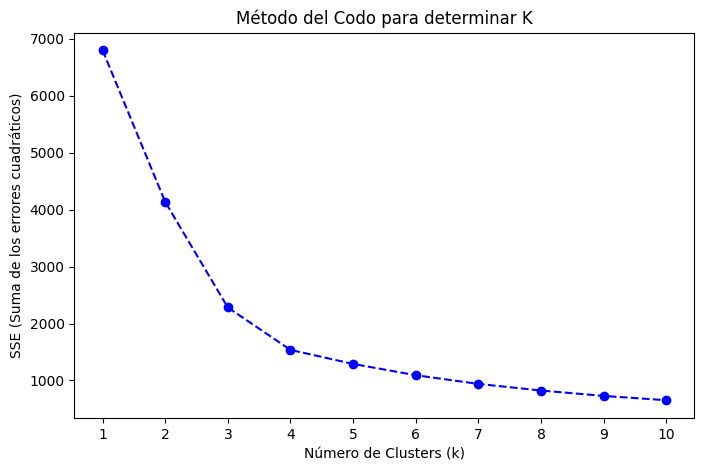

In [4]:


K_range = range(1, 11)  # Probamos de 1 a 10 clusters
sse = []  # Lista para guardar los valores de inercia (SSE)

# Aplicar K-Means para diferentes valores de k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_kmeans[["Feature_1", "Feature_2"]])
    sse.append(kmeans.inertia_)  # Inercia (suma de los errores cuadráticos)

# Graficar el diagrama de codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSE (Suma de los errores cuadráticos)")
plt.title("Método del Codo para determinar K")
plt.xticks(K_range)
plt.show()

Segun el diagra de codo el mejor k = 4, a partir de 5 en adelante no hay disminución significativa de los SSE

In [5]:

k_optimo = 4

# K-Means
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df_kmeans["Cluster"] = kmeans.fit_predict(df_kmeans[["Feature_1", "Feature_2"]])

# Se obtienen los centroides
centroids = kmeans.cluster_centers_


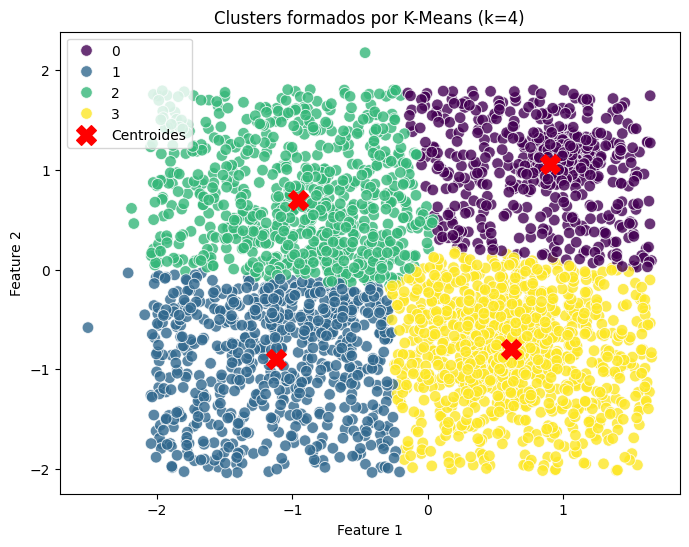

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_kmeans["Feature_1"], y=df_kmeans["Feature_2"], hue=df_kmeans["Cluster"], palette="viridis", s=70, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label="Centroides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Clusters formados por K-Means (k={k_optimo})")
plt.legend()
plt.show()



In [7]:
df_kmeans.groupby("Cluster").mean()


,Feature_1,Feature_2
Cluster,,
0,0.906497,1.057595
1,-1.124961,-0.892301
2,-0.957629,0.700525
3,0.611841,-0.800402


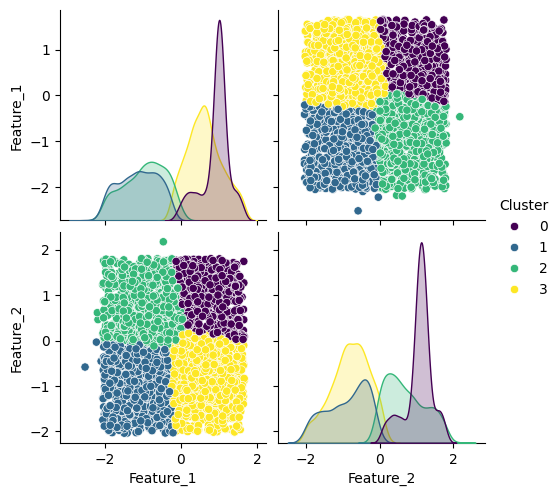

In [9]:
import seaborn as sns
sns.pairplot(df_kmeans, hue="Cluster", palette="viridis")


In [10]:
# Contar cuántos datos hay en cada cluster
cluster_counts = df_kmeans["Cluster"].value_counts()

# Imprimir el número de datos por cluster
print(cluster_counts)


Cluster
3    1093
0     886
2     757
1     664
Name: count, dtype: int64


In [16]:
# Calcular la desviación estándar de cada Feature por cluster
std_per_cluster = df_kmeans.groupby("Cluster").std()

# Imprimir la desviación estándar por cluster
print(std_per_cluster)


         Feature_1  Feature_2
Cluster                      
0         0.355083   0.354062
1         0.508017   0.555062
2         0.540517   0.534094
3         0.453606   0.504333


In [17]:
# Calcular los valores mínimos y máximos de cada característica por cluster
range_per_cluster = df_kmeans.groupby("Cluster").agg([min, max])

# Imprimir los rangos por cluster
print(range_per_cluster)


        Feature_1           Feature_2          
              min       max       min       max
Cluster                                        
0       -0.146443  1.653110  0.024548  1.802637
1       -2.510792 -0.208107 -2.038307 -0.033874
2       -2.188982  0.039302 -0.160531  2.175390
3       -0.275995  1.654316 -2.016592  0.176394


<ipython-input-17-016d928b40f7>:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_per_cluster = df_kmeans.groupby("Cluster").agg([min, max])
<ipython-input-17-016d928b40f7>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_per_cluster = df_kmeans.groupby("Cluster").agg([min, max])


# Analisis General:
Las gráficas muestran:

El Método del Codo: Se observa una disminución drástica en la inercia hasta alrededor de ( k=3 ) o ( k=4 ), donde comienza a estabilizarse siendo un punto optimo, sin embargo alcanza a disminuir el SSE de 3 a 4 clusters, por lo cual se selecciona k=4

Visualización de Clústeres:

1. Dispersión de Puntos
En la visualización de los clústeres, se observa que los puntos están bien distribuidos en el espacio.
K-Means agrupa datos que están más juntos en regiones específicas. Si los puntos estuvieran más dispersos, el algoritmo tendría más dificultad en encontrar clústeres compactos y bien definidos.
2. Densidad
hay mas densidad en ciertos grupos que en otros
En las regiones más densas, K-Means logra agrupar de forma precisa, ya que el algoritmo favorece la formación de grupos compactos.
En áreas menos densas, los clústeres pueden incluir puntos dispersos que podrían no pertenecer realmente a un grupo, lo que posiblemente afecta la precisión del modelo.
3. Ruido
En las imágenes se pueden ver algunos puntos alejados de los centroides o en los bordes de los clústeres.
K-Means no maneja bien el ruido (puntos atípicos), ya que siempre asigna cada punto a un clúster

# Analisis Especifico:

Cluster 0: Es el cluster que mas densidad tiene, es decir que los datos estan concentrados en una zona especifica, es el segundo cluster con mas datos y tiene 0.355083 de desviación estandar en la caracteristica uno y 0.354062 en la caracteristica 2, esto tiene sentido ya que al tener mas densidad, tendra menos desviación estandar

Cluster 1 y 2: ambos tienen una densidad parecida, existe densidad pero no tan alta como en el cluster 1, de la misma forma aumenta la dispersion de los datos en el cluster 1 tiene 0.508 en la caracteristica 1 y 0.5506 en la caracteristica 2, mientras que el cluster 2 sus datos tienen 0.540 de desviación estandar en la caracteristica 1 y 0.534 en la caracteristica 2.

Cluster 3: Es el segundo cluster que tiene mas densidad en las dos variables, es el cluster que tiene mas datos y tieene una dispersion en los datos de la caracteristica uno: 0.453606 y en la caracteristica 2 de 0.504333.

En el ultimo codigo se puede observar de donde a donde se comprenden los datos en cada cluster.





# K-MEANS DATASET: 3d_clusters_dataset

In [18]:
df_clusters = pd.read_csv("/content/3d_clusters_dataset.csv")
df_clusters.head(10)

,Feature_1,Feature_2,Feature_3
0,8.974963,8.698414,8.887730
1,10.083353,9.183306,9.901129
2,8.880975,9.550283,8.939978
3,10.283602,9.964106,10.576047
4,9.770535,9.781256,9.986899
5,10.787800,10.769673,10.889979
6,11.511066,10.763371,11.218839
7,11.002097,11.018792,10.819974
8,9.866001,8.742593,9.371136
9,11.150279,10.759745,10.883323


In [19]:
df_clusters.describe()

,Feature_1,Feature_2,Feature_3
count,6000.000000,6000.000000,6000.000000
mean,0.146187,0.277944,0.143773
std,4.200568,4.174595,4.199314
min,-11.920768,-12.296507,-12.047898
25%,-0.922627,-0.427730,-0.918492
50%,0.377738,0.473522,0.361881
75%,1.119166,1.095102,1.112939
max,11.875921,12.231552,12.541093


Esta vez normalizamos porque:

La media no es exactamente 0.
La desviación estándar es mayor que 1 (~4.2 en todas las variables).
Los valores van desde -12 hasta +12, lo que indica una gran variabilidad en la escala.
Como K-Means usa distancias euclidianas, las variables con valores más grandes influirán más en la formación de los clusters.

Solución: Normalizar con StandardScaler para que los datos tengan media = 0 y desviación estándar = 1.

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clusters[["Feature_1", "Feature_2", "Feature_3"]])  # Normaliza todas las variables

In [21]:

df_scaled = pd.DataFrame(df_scaled, columns=["Feature_1", "Feature_2", "Feature_3"], index=df_clusters.index)

df_scaled.describe()

,Feature_1,Feature_2,Feature_3
count,6.000000e+03,6.000000e+03,6.000000e+03
mean,-7.697546e-18,-1.657933e-17,2.486900e-17
std,1.000083e+00,1.000083e+00,1.000083e+00
min,-2.872936e+00,-3.012387e+00,-2.903495e+00
25%,-2.544664e-01,-1.690541e-01,-2.529827e-01
50%,5.512841e-02,4.685364e-02,5.194316e-02
75%,2.316496e-01,1.957619e-01,2.308107e-01
max,2.792649e+00,2.863656e+00,2.952471e+00


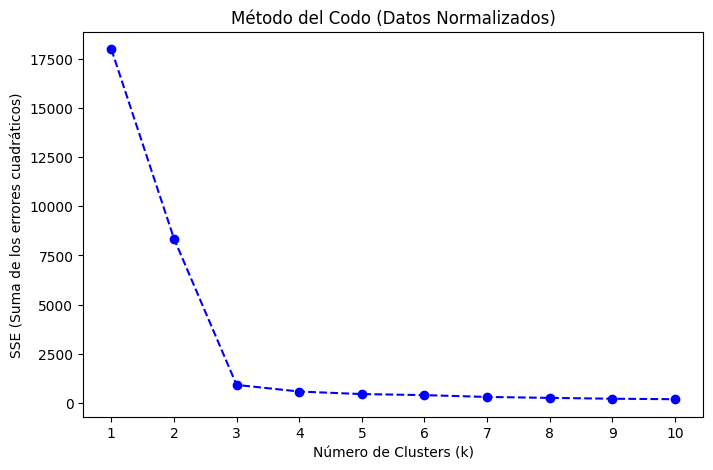

In [22]:

K_range = range(1, 11)
sse = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Se graficara el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o', linestyle='--', color='b')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSE (Suma de los errores cuadráticos)")
plt.title("Método del Codo (Datos Normalizados)")
plt.xticks(K_range)
plt.show()


El mejor K=3 de 4 en adelante no disminuye significativamente el SSE

In [23]:
# Definir el número óptimo de clusters según el método del codo
k_optimo = 3

# Aplicar K-Means
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)  # Usamos los datos normalizados

# Agregar los clusters al DataFrame original
df_clusters["Cluster"] = clusters


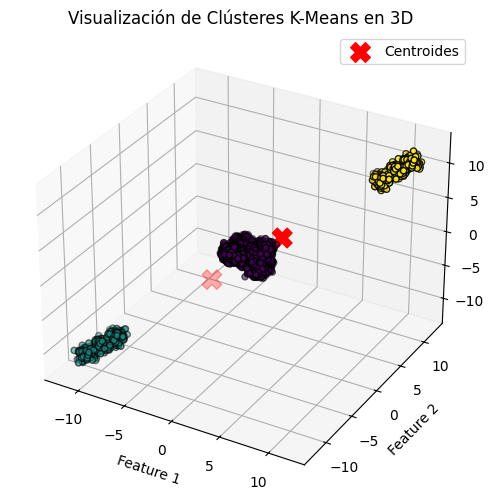

Características de cada clúster:
         Feature_1  Feature_2  Feature_3
Cluster                                 
0         0.166258   0.335764   0.167691
1        -9.956167 -10.013156  -9.977818
2        10.047833   9.990844  10.026182


In [27]:
# Elegir el número óptimo de clústeres (ajustar basado en la gráfica)
k_optimo = 3

# Entrenar el modelo K-Means con el número óptimo de clústeres
kmeans_3d = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans_3d.fit(df_scaled)
df_clusters['Cluster'] = kmeans_3d.labels_

# Visualizar los clústeres en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clusters['Feature_1'], df_clusters['Feature_2'], df_clusters['Feature_3'], c=df_clusters['Cluster'], cmap='viridis', edgecolor='k')
ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroides')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Visualización de Clústeres K-Means en 3D')
plt.legend()
plt.show()

# Análisis de los clústeres
grouped_3d = df_clusters.groupby('Cluster').mean()
print("Características de cada clúster:")
print(grouped_3d)

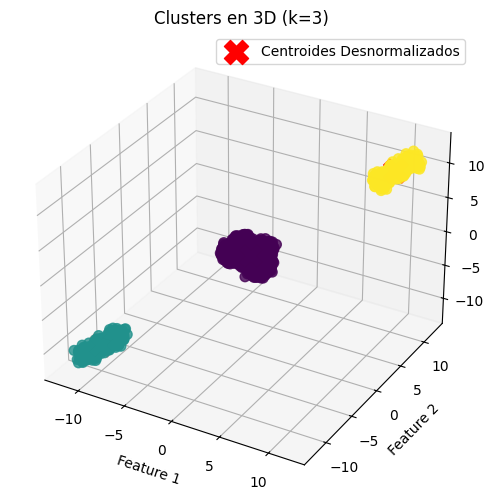

In [25]:
# Desnormalizar los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Graficar los centroides desnormalizados en el gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de los clusters
scatter = ax.scatter(df_clusters["Feature_1"], df_clusters["Feature_2"], df_clusters["Feature_3"],
                     c=df_clusters["Cluster"], cmap="viridis", s=50, alpha=0.8)

# Graficar los centroides desnormalizados con un marcador más grande
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           marker='X', s=300, color='red', label="Centroides Desnormalizados")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title(f"Clusters en 3D (k={k_optimo})")
ax.legend()

plt.show()


In [34]:
#!pip install plotly
import plotly.express as px # Import the plotly.express module and assign it to the alias 'px'
from mpl_toolkits.mplot3d import Axes3D
k_optimo = 3

# Entrenar el modelo K-Means con el número óptimo de clústeres
kmeans_3d = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans_3d.fit(df_scaled)
df_clusters['Cluster'] = kmeans_3d.labels_

# Visualización interactiva con Plotly
fig = px.scatter_3d(df_clusters, x='Feature_1', y='Feature_2', z='Feature_3', color=df_clusters['Cluster'].astype(str),
                     title='Visualización Interactiva de Clústeres K-Means en 3D')
fig.update_traces(marker=dict(size=1, opacity=0.8))
fig.show()

# Análisis de los clústeres
grouped_3d = df_clusters.groupby('Cluster').mean()
print("Características de cada clúster:")
print(grouped_3d)
k_optimo = 3

Características de cada clúster:
         Feature_1  Feature_2  Feature_3
Cluster                                 
0         0.166258   0.335764   0.167691
1        -9.956167 -10.013156  -9.977818
2        10.047833   9.990844  10.026182


In [36]:
# Contar cuántos datos hay en cada cluster
cluster_counts = df_clusters["Cluster"].value_counts()

# Imprimir el número de datos por cluster
print(cluster_counts)


Cluster
0    5000
2     500
1     500
Name: count, dtype: int64


In [37]:
# Calcular la desviación estándar de cada Feature por cluster
std_per_cluster = df_clusters.groupby("Cluster").std()

# Imprimir la desviación estándar por cluster
print(std_per_cluster)


         Feature_1  Feature_2  Feature_3
Cluster                                 
0         0.999338   0.846301   0.989624
1         0.925538   0.932619   0.906494
2         0.871562   0.885560   0.922648


In [38]:
# Calcular los valores mínimos y máximos de cada característica por cluster
range_per_cluster = df_clusters.groupby("Cluster").agg([min, max])

# Imprimir los rangos por cluster
print(range_per_cluster)


         Feature_1             Feature_2             Feature_3           
               min        max        min        max        min        max
Cluster                                                                  
0        -2.288407   2.313647  -2.109526   2.350953  -2.568960   2.541093
1       -11.920768  -7.968116 -12.296507  -7.959327 -12.047898  -8.099026
2         7.841498  11.875921   8.202506  12.231552   7.860583  12.541093


<ipython-input-38-1a559298f304>:2: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

<ipython-input-38-1a559298f304>:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



### Analisis General

### **1. Distribución de los Clústeres**


1. La visualización en Plotly muestra que los puntos están claramente separados en tres grupos bien definidos y los centroides (marcados con "X" en rojo) están ubicados en el centro de cada clúster, lo que indica que el modelo logró identificar patrones en los datos.

### **2. Características de los Clústeres**


1. De la tabla de promedios de cada clúster:

- Clúster 0 (Centro cercano a (0.16, 0.33, 0.16)):

- Se encuentra en la zona central del espacio, lo que sugiere que agrupa datos alrededor del origen.
- Podría ser un grupo con valores más neutros o promedios dentro del dataset.
Clúster 1 (Centro en (-9.95, -10.01, -9.97)):

- Se encuentra en una zona negativa en todas sus dimensiones.
Representa un grupo con valores bajos en comparación con los demás clústeres.
Clúster 2 (Centro en (10.04, 9.99, 10.02)):

- Está en la región positiva del espacio.
Se diferencia completamente del clúster 1, lo que indica una segmentación clara de los datos.

### **3. Factores que Afectan la Agrupación**

- Dispersión:

Los puntos están bien agrupados, lo que facilita la identificación de clústeres.
Si los puntos estuvieran más dispersos, K-Means podría tener problemas en definir límites precisos.
- Densidad:

Los grupos están compactos, lo que ayuda a K-Means a encontrar centros óptimos.
Si hubiera áreas con menos densidad, algunos puntos podrían asignarse incorrectamente a clústeres lejanos.


###Analisis especifico
#Cantidad de datos por cluster
Cluster 0: Es el cluster con mas datos (5000 datos)
Cluster 1 y 2: cada cluster tiene 500 datos

#Desviación estandar
Todos los cluster en cada caracteristica tiene una desviacion estandar grande, sin embargo existen 2 eespacios que generan 3 grupos de datos y es por lo cual el modelo establecio que el mejor k=3